# <center> WindTurbine Power Prediction </center>

### Energy Limited
Company Introduction
Your client for this project is Renewable energy institution.

They are going to provide an amount of power generated from a wind turbine in KW/hr by using the real time data.
Factors such as temperature, wind direction, turbine status, weather, blade length, etc. influence the amount of power generated.
We have to select the most important features which help us to generate more power in an efficient way.

Current Scenario
The company rolled out this service to several areas and they will monitor which features can increase the power generated by the turbines.Using this they can map those areas for future investments.

# Problem Statement

Moving from traditional energy plans powered by fossil fuels to unlimited renewable energy subscriptions allows for instant access to clean energy without heavy investment in infrastructure like Wind Turbines.

The current process suffers from the following problems:

One issue is that spinning turbine blades can pose a threat to flying wildlife like birds and bats.
Wind energy can have adverse environmental impacts, including the potential to reduce, fragment, or degrade habitat for wildlife, fish, and plants
The company wants to figure out how they can manage these challenges to produce wind energy in an efficient manner.

The energy department has hired you as data science consultants.

Your Role
You are given datasets of wind turbines and the power generated by them.<br>
Your task is to build a regression model using the datasets.<br>
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables
Deliverable: Predict the power that is generated (in KW/h) based on the various features provided in the dataset.<br>
Machine Learning Task: <b>Regression</b><br>
Target Variable: <b>windmill_generated_power(kW/h)</b><br>
Win Condition: N/A (best possible model)

Evaluation Metric
The model evaluation will be based on the <b>r2 score.</b> 

# Data Description

<table>	<th>	Column Name	</th>	<th>	Description	</th>
<tr>	<td>	tracking_id	</td>	<td>	Represents a unique identification number of a windmill	</td>
<tr>	<td>	datetime	</td>	<td>	Represents the date and time of a record	</td>
<tr>	<td>	wind_speed(m/s)	</td>	<td>	Represents the speed of wind (in meter per second)	</td>
<tr>	<td>	atmospheric_temperature(°C)	</td>	<td>	Represents the temperature (in degree Celsius) of a town or village that the windmill is present in	</td>
<tr>	<td>	shaft_temperature(°C)	</td>	<td>	Represents the temperature of the shaft (in degree Celsius)	</td>
<tr>	<td>	blades_angle(°)	</td>	<td>	Represents the angle of the blades of a wind turbine (in degrees)	</td>
<tr>	<td>	gearbox_temperature(°C)	</td>	<td>	Represents the temperature of a gearbox (in degree Celsius)	</td>
<tr>	<td>	engine_temperature(°C)	</td>	<td>	Represents the temperature of an engine (in degree Celsius)	</td>
<tr>	<td>	motor_torque(N-m)	</td>	<td>	Represents the torque of a motor (in Newton meter)	</td>
<tr>	<td>	generator_temperature(°C)	</td>	<td>	Represents the temperature of a generator (in degree Celsius)	</td>
<tr>	<td>	atmospheric_pressure(Pascal)	</td>	<td>	Represents the atmospheric pressure (in Pascals) in that area	</td>
<tr>	<td>	area_temperature(°C)	</td>	<td>	Represents the temperature (in degree Celsius) of the area within a 100 m radius of the windmill	</td>
<tr>	<td>	windmill_body_temperature(°C)	</td>	<td>	Represents the temperature of the body of a windmill (in degree Celsius)	</td>
<tr>	<td>	wind_direction(°)	</td>	<td>	Represents the direction of the wind (in degrees)	</td>
<tr>	<td>	resistance(ohm)	</td>	<td>	Represents the resistance against the wind	</td>
<tr>	<td>	rotor_torque(N-m)	</td>	<td>	Represents the torque of a rotor (in Newton meter)	</td>
<tr>	<td>	turbine_status	</td>	<td>	Represents the torque of a rotor (in Newton meter)	</td>
<tr>	<td>	cloud_level	</td>	<td>	Represents the following levels of the cloud in the sky on a particular day:Extremely low, Low,Medium	</td>
<tr>	<td>	blade_length(m)	</td>	<td>	Represents the length of the blades of a windmill (in meter)	</td>
<tr>	<td>	blade_breadth(m)	</td>	<td>	Represents the breadth of the blades of a windmill (in meter)	</td>
<tr>	<td>	windmill_height(m)	</td>	<td>	Represents the height of the blades of a windmill (in meter)	</td>
<tr>	<td>	windmill_generated_power(kW/h)	</td>	<td>	Represents the power generated (in Kilowatt per hour)	</td>
</table>

In [26]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import profile_report
import dtale

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
train_data=pd.read_csv('train.csv')
train_data.shape

(19740, 22)

In [3]:
train_data.isnull().sum().any()

True

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     19740 non-null  object 
 1   datetime                        19740 non-null  object 
 2   wind_speed(m/s)                 19553 non-null  float64
 3   atmospheric_temperature(°C)     17295 non-null  float64
 4   shaft_temperature(°C)           19738 non-null  float64
 5   blades_angle(°)                 19594 non-null  float64
 6   gearbox_temperature(°C)         19739 non-null  float64
 7   engine_temperature(°C)          19732 non-null  float64
 8   motor_torque(N-m)               19721 non-null  float64
 9   generator_temperature(°C)       19731 non-null  float64
 10  atmospheric_pressure(Pascal)    17822 non-null  float64
 11  area_temperature(°C)            19740 non-null  float64
 12  windmill_body_temperature(°C)   

In [6]:
test_data=pd.read_csv('test.csv')
test_data.shape

(8460, 21)

In [7]:
train_data.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    187
atmospheric_temperature(°C)       2445
shaft_temperature(°C)                2
blades_angle(°)                    146
gearbox_temperature(°C)              1
engine_temperature(°C)               8
motor_torque(N-m)                   19
generator_temperature(°C)            9
atmospheric_pressure(Pascal)      1918
area_temperature(°C)                 0
windmill_body_temperature(°C)     1658
wind_direction(°)                 3568
resistance(ohm)                      1
rotor_torque(N-m)                  391
turbine_status                    1240
cloud_level                        191
blade_length(m)                   3546
blade_breadth(m)                     0
windmill_height(m)                 368
windmill_generated_power(kW/h)     145
dtype: int64

In [8]:
# We cannot keep null Target variable in Windmill_genearted_power hence deleting the same

train_data1 = train_data.copy()

In [20]:
train_data1.dropna(subset=['windmill_generated_power(kW/h)'],inplace=True)

In [24]:
train_data1.isnull().sum()/len(train_data1)*100

tracking_id                        0.000000
datetime                           0.000000
wind_speed(m/s)                    0.944118
atmospheric_temperature(°C)       12.370503
shaft_temperature(°C)              0.010207
blades_angle(°)                    0.729778
gearbox_temperature(°C)            0.005103
engine_temperature(°C)             0.040827
motor_torque(N-m)                  0.096964
generator_temperature(°C)          0.045930
atmospheric_pressure(Pascal)       9.732075
area_temperature(°C)               0.000000
windmill_body_temperature(°C)      8.410309
wind_direction(°)                 18.065833
resistance(ohm)                    0.005103
rotor_torque(N-m)                  1.969890
turbine_status                     6.302628
cloud_level                        0.969635
blade_length(m)                   17.979076
blade_breadth(m)                   0.000000
windmill_height(m)                 1.857617
windmill_generated_power(kW/h)     0.000000
dtype: float64

In [27]:
d = dtale.show(train_data1)
d.open_browser()

In [28]:
train_data1.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [29]:
ColstobeDropped = ['tracking_id', 'datetime']

In [31]:
train_data1.drop(ColstobeDropped,axis=1,inplace=True)

In [33]:
train_data1.isnull().sum()

wind_speed(m/s)                    185
atmospheric_temperature(°C)       2424
shaft_temperature(°C)                2
blades_angle(°)                    143
gearbox_temperature(°C)              1
engine_temperature(°C)               8
motor_torque(N-m)                   19
generator_temperature(°C)            9
atmospheric_pressure(Pascal)      1907
area_temperature(°C)                 0
windmill_body_temperature(°C)     1648
wind_direction(°)                 3540
resistance(ohm)                      1
rotor_torque(N-m)                  386
turbine_status                    1235
cloud_level                        190
blade_length(m)                   3523
blade_breadth(m)                     0
windmill_height(m)                 364
windmill_generated_power(kW/h)       0
dtype: int64

In [60]:
MissCols = train_data1[train_data1.columns[train_data1.isnull().sum()>0]].columns

In [56]:
Misscols1 = set(MissCols) - set(train_data1.describe().columns)

In [57]:
Misscols1

{'cloud_level', 'turbine_status'}

In [61]:
for i in MissCols:
    train_data1[i].fillna(train_data1[i].median(),inplace=True)

In [62]:
train_data1.isnull().sum()

wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
dtype: int64

<AxesSubplot:>

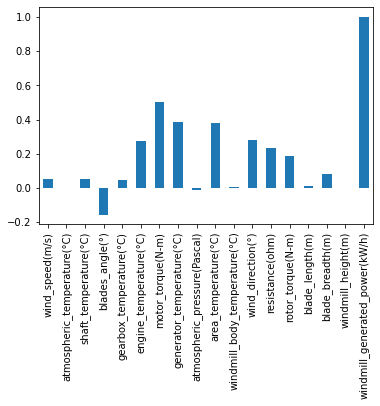

In [67]:
%matplotlib inline
train_data1.corr()['windmill_generated_power(kW/h)'].plot(kind='bar')

In [69]:
#Converting categorical variable  to Numerical Variable
train_data1 = pd.get_dummies(train_data1)

In [95]:
train_data1

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,94.543507,16.704395,43.874007,-1.108194,44.235594,42.006085,2539.820006,80.817567,18004.731911,31.902948,...,0,0,0,0,0,0,0,0,0,1
1,94.711791,-99.000000,-99.000000,5.060558,42.255446,40.209990,1984.417193,71.490737,17157.365775,30.893334,...,0,0,0,0,0,0,0,0,0,1
2,95.268257,16.161270,44.958045,0.138448,-46.043109,40.544919,2088.008555,70.842057,-395708.768539,44.515427,...,0,0,0,0,0,0,1,0,1,0
3,309.344194,16.447248,44.216279,-99.000000,41.137433,42.331889,2162.657844,70.735399,17206.921353,37.428052,...,0,0,0,0,0,0,0,0,0,1
4,95.495649,25.871329,44.061447,-1.027115,45.051215,44.805741,2618.577149,77.374691,17242.773361,45.157833,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,-115.354647,44.663663,45.031291,4.022437,8.032358,43.412851,2687.670267,93.135127,460907.578171,43.594197,...,0,0,1,0,0,0,0,0,0,1
19736,95.854671,25.408621,101.067704,-99.000000,46.635625,42.547409,2327.510330,79.837357,18378.055318,38.741247,...,0,0,0,0,1,0,0,0,1,0
19737,101.977143,16.161270,42.775058,0.851994,44.934351,44.713309,2042.373482,72.615407,17316.925775,36.320718,...,0,0,0,0,0,0,0,0,1,0
19738,93.382523,17.375045,43.028730,-1.196709,-25.632597,46.327066,2158.935324,75.194611,17190.731675,32.269551,...,0,0,0,0,0,1,0,0,1,0


In [107]:
X=train_data1.drop('windmill_generated_power(kW/h)',axis=1)
y=train_data1['windmill_generated_power(kW/h)']
print(X.shape,y.shape)

(19595, 34) (19595,)


In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(15676, 34) (15676,) (3919, 34) (3919,)


In [109]:
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)
X_test[X_test.columns] = SS.fit_transform(X_test)
X_train.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
10299,0.362880,0.887513,0.096074,1.156337,-0.015867,-0.459192,-0.780532,0.070263,-0.196946,0.503676,...,-0.267936,3.759159,-0.273232,-0.262425,-0.27161,-0.266704,-0.268892,-0.100581,0.990729,-0.971074
18776,0.350213,0.693572,0.133727,0.169616,0.064774,-0.191087,0.960708,0.608323,-0.191177,0.316736,...,-0.267936,-0.266017,3.659899,-0.262425,-0.27161,-0.266704,-0.268892,-0.100581,0.990729,-0.971074
13715,0.315873,0.372802,0.121877,1.154735,-0.033793,0.010714,-0.742401,0.136196,-0.195490,-1.135586,...,-0.267936,-0.266017,-0.273232,-0.262425,-0.27161,-0.266704,-0.268892,-0.100581,0.990729,-0.971074
7982,-0.047561,0.392387,0.162110,-1.892973,0.096494,-0.213675,0.722842,0.571461,-0.188732,0.699047,...,-0.267936,-0.266017,-0.273232,-0.262425,-0.27161,-0.266704,3.718959,-0.100581,0.990729,-0.971074
15701,0.324912,0.332549,0.269761,0.202164,0.097042,0.834904,1.417705,1.063606,-0.181954,0.702621,...,-0.267936,-0.266017,-0.273232,-0.262425,-0.27161,-0.266704,-0.268892,-0.100581,-1.009357,1.029788


In [112]:
'''Feat = SelectFromModel(estimator=RandomForestRegressor(random_state=42))
Feat.fit(X_train,y_train)
sel_features = X_train.columns[Feat.get_support()].to_list()
print(sel_features)
'''
print(np.round(Feat.threshold_,decimals=2))

0.03


In [113]:
# Model1 - LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
LR_Train = LR.predict(X_train)
LR_Test = LR.predict(X_test)
print(r2_score(y_train,LR_Train))
print(r2_score(y_test,LR_Test))

0.4117401734552423
-1.7240441211532824e+20


In [119]:
#Model2 - RandomForestRegressor
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train,y_train)
RF_Train = RF.predict(X_train)
RF_Test = RF.predict(X_test)
print(r2_score(y_train,RF_Train))
print(r2_score(y_test,RF_Test))

0.993495092795886
0.9389602449332537


In [121]:
#Model2 - RandomForestRegressor
from xgboost import XGBRegressor,XGBRFRegressor
xg = XGBRFRegressor(random_state=42)
xg.fit(X_train,y_train)
xg_Train = xg.predict(X_train)
xg_Test = xg.predict(X_test)
print(r2_score(y_train,xg_Train))
print(r2_score(y_test,xg_Test))

0.9115333613287885
0.890830416517571


In [122]:
test_data1 = test_data.copy()

In [123]:
test_data1.drop(ColstobeDropped,axis=1,inplace=True)

In [124]:
MissCols = test_data1[test_data1.columns[test_data1.isnull().sum()>0]].columns

In [125]:
MissCols

Index(['wind_speed(m/s)', 'atmospheric_temperature(°C)', 'blades_angle(°)',
       'engine_temperature(°C)', 'motor_torque(N-m)',
       'generator_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'windmill_body_temperature(°C)', 'wind_direction(°)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'windmill_height(m)'],
      dtype='object')

In [131]:
Misscols_cat =  set(MissCols) - set(test_data1.describe())

In [135]:
Misscols_cat

{'cloud_level', 'turbine_status'}

In [138]:
Misscols_num = set(test_data1.describe()) - set(Misscols_cat)

In [139]:
Misscols_num

{'area_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'atmospheric_temperature(°C)',
 'blade_breadth(m)',
 'blade_length(m)',
 'blades_angle(°)',
 'engine_temperature(°C)',
 'gearbox_temperature(°C)',
 'generator_temperature(°C)',
 'motor_torque(N-m)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'shaft_temperature(°C)',
 'wind_direction(°)',
 'wind_speed(m/s)',
 'windmill_body_temperature(°C)',
 'windmill_height(m)'}

In [141]:
for i in Misscols_num:
    test_data1[i].fillna(test_data1[i].median(),inplace=True)

In [142]:
for i in Misscols_cat:
    test_data1[i].fillna(test_data1[i].mode()[0],inplace=True)

In [143]:
test_data1.isnull().sum().any()

False

In [145]:
final_test = pd.get_dummies(test_data1)

In [147]:
final_test

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,96.889586,19.808427,74.891389,43.691961,43.796380,41.470878,1096.349402,71.848627,16531.411599,41.500572,...,0,0,0,0,0,0,0,0,0,1
1,10.099765,1.766143,11.586161,-99.000000,13.967744,11.952156,534.155038,38.107687,565239.057147,21.415270,...,0,0,0,0,0,0,1,0,1,0
2,94.395591,24.185922,44.141326,-0.395538,45.613177,45.037685,2875.042178,81.796214,17408.104397,31.753474,...,0,0,0,0,0,0,0,0,1,0
3,98.541350,34.084521,44.686674,9.661323,48.121819,47.945314,2777.902185,93.732182,18191.550526,41.890847,...,0,0,0,0,1,0,0,0,1,0
4,11.805697,1.447166,13.396429,1.606224,15.527894,12.046752,759.937716,38.269123,113284.111693,22.930779,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,94.044995,-9.393385,15.668388,0.514174,47.556638,43.308910,2887.427844,88.097712,18771.997541,41.903137,...,0,0,0,0,1,0,0,0,0,1
8456,-119.349178,16.791928,43.457581,-1.181327,-64.301838,42.989804,2668.731425,83.614673,18300.540456,36.191099,...,0,0,0,0,1,0,0,0,0,1
8457,14.213248,13.646099,3.045878,0.210453,-62.903994,43.481461,778.294597,37.469882,112281.786616,27.699942,...,0,0,0,0,0,0,1,0,1,0
8458,25.675187,12.925595,45.357568,-1.321548,108.006772,45.193653,867.167326,39.998241,117429.243716,30.343857,...,0,0,0,0,0,0,0,0,1,0


In [148]:
final_test[final_test.columns] = SS.transform(final_test)

In [149]:
final_test

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,0.354195,0.407075,1.305860,1.113594,0.079630,-0.186224,-0.736752,0.350763,-0.170713,1.163287,...,-0.288436,-0.27039,-0.264916,-0.260475,-0.275785,-0.26821,-0.264364,-0.107777,-1.007942,1.031367
1,-0.802277,-0.033648,-1.056782,-1.858429,-0.623051,-5.050669,-1.415693,-1.348755,2.968939,-1.483168,...,-0.288436,-0.27039,-0.264916,-0.260475,-0.275785,-0.26821,3.782670,-0.107777,0.992121,-0.969587
2,0.320962,0.514005,0.158224,0.195328,0.122429,0.401557,1.411309,0.851819,-0.165697,-0.120998,...,-0.288436,-0.27039,-0.264916,-0.260475,-0.275785,-0.26821,-0.264364,-0.107777,0.992121,-0.969587
3,0.376204,0.755801,0.178577,0.404795,0.181525,0.880710,1.293997,1.453029,-0.161214,1.214710,...,-0.288436,-0.27039,-0.264916,-0.260475,3.626019,-0.26821,-0.264364,-0.107777,0.992121,-0.969587
4,-0.779545,-0.041440,-0.989220,0.237022,-0.586298,-5.035080,-1.143024,-1.340624,0.382897,-1.283483,...,3.466978,-0.27039,-0.264916,-0.260475,-0.275785,-0.26821,-0.264364,-0.107777,0.992121,-0.969587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,0.316291,-0.306245,-0.904427,0.214276,0.168211,0.116669,1.426267,1.169223,-0.157893,1.216329,...,-0.288436,-0.27039,-0.264916,-0.260475,3.626019,-0.26821,-0.264364,-0.107777,-1.007942,1.031367
8456,-2.527179,0.333390,0.132705,0.178962,-2.466867,0.064083,1.162155,0.943414,-0.160590,0.463707,...,-0.288436,-0.27039,-0.264916,-0.260475,3.626019,-0.26821,-0.264364,-0.107777,-1.007942,1.031367
8457,-0.747465,0.256546,-1.375517,0.207950,-2.433938,0.145104,-1.120855,-1.380881,0.377161,-0.655094,...,-0.288436,-0.27039,-0.264916,-0.260475,-0.275785,-0.26821,3.782670,-0.107777,0.992121,-0.969587
8458,-0.594735,0.238947,0.203616,0.176041,1.592250,0.427259,-1.013527,-1.253529,0.406615,-0.306730,...,-0.288436,-0.27039,-0.264916,-0.260475,-0.275785,-0.26821,-0.264364,-0.107777,0.992121,-0.969587


In [150]:
prediction = RF.predict(final_test)

In [152]:
finalop = pd.DataFrame(test_data['tracking_id'])

In [154]:
finalop['prediction'] = prediction

In [155]:
finalop.describe()

,prediction
count,8460.000000
mean,6.245708
std,2.637539
min,1.451856
25%,4.300731
50%,5.709083
75%,8.091290
max,18.110530


In [159]:
finalop.to_csv('submission.csv',header=False,index=False)